To run this notebook you will need to bike sharing dataset found here: https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

Download that data and place the extracted folder called archive in the director like this:

    |- ...

    |- archive
    |-WeekleyNotes
        |-Unit 1
            |- Bike Sharing Example.ipynb

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
%matplotlib inline
import os
print(os.listdir("../../archive"))

['day.csv', 'hour.csv', 'Readme.txt']


In [2]:
dataset = pd.read_csv("../../archive/day.csv") # Path to bike sharing data
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**cnt** which is what we are trying to predict, is just the sum of the **casual** and **registered** features. So let us drop those two features for the sake of this exercise

In [3]:
# dataset.columns returns list of column names
dataset.drop(['instant','dteday','registered', 'casual'], axis = 'columns', inplace = True)
dataset

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [4]:
dataset = pd.get_dummies(dataset, columns=['season'], drop_first=True)
dataset

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0,0,0
1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0,0,0
2,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0
3,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0
4,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114,0,0,0
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095,0,0,0
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341,0,0,0
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796,0,0,0


## Simple data exploration

### Scatter Matrix

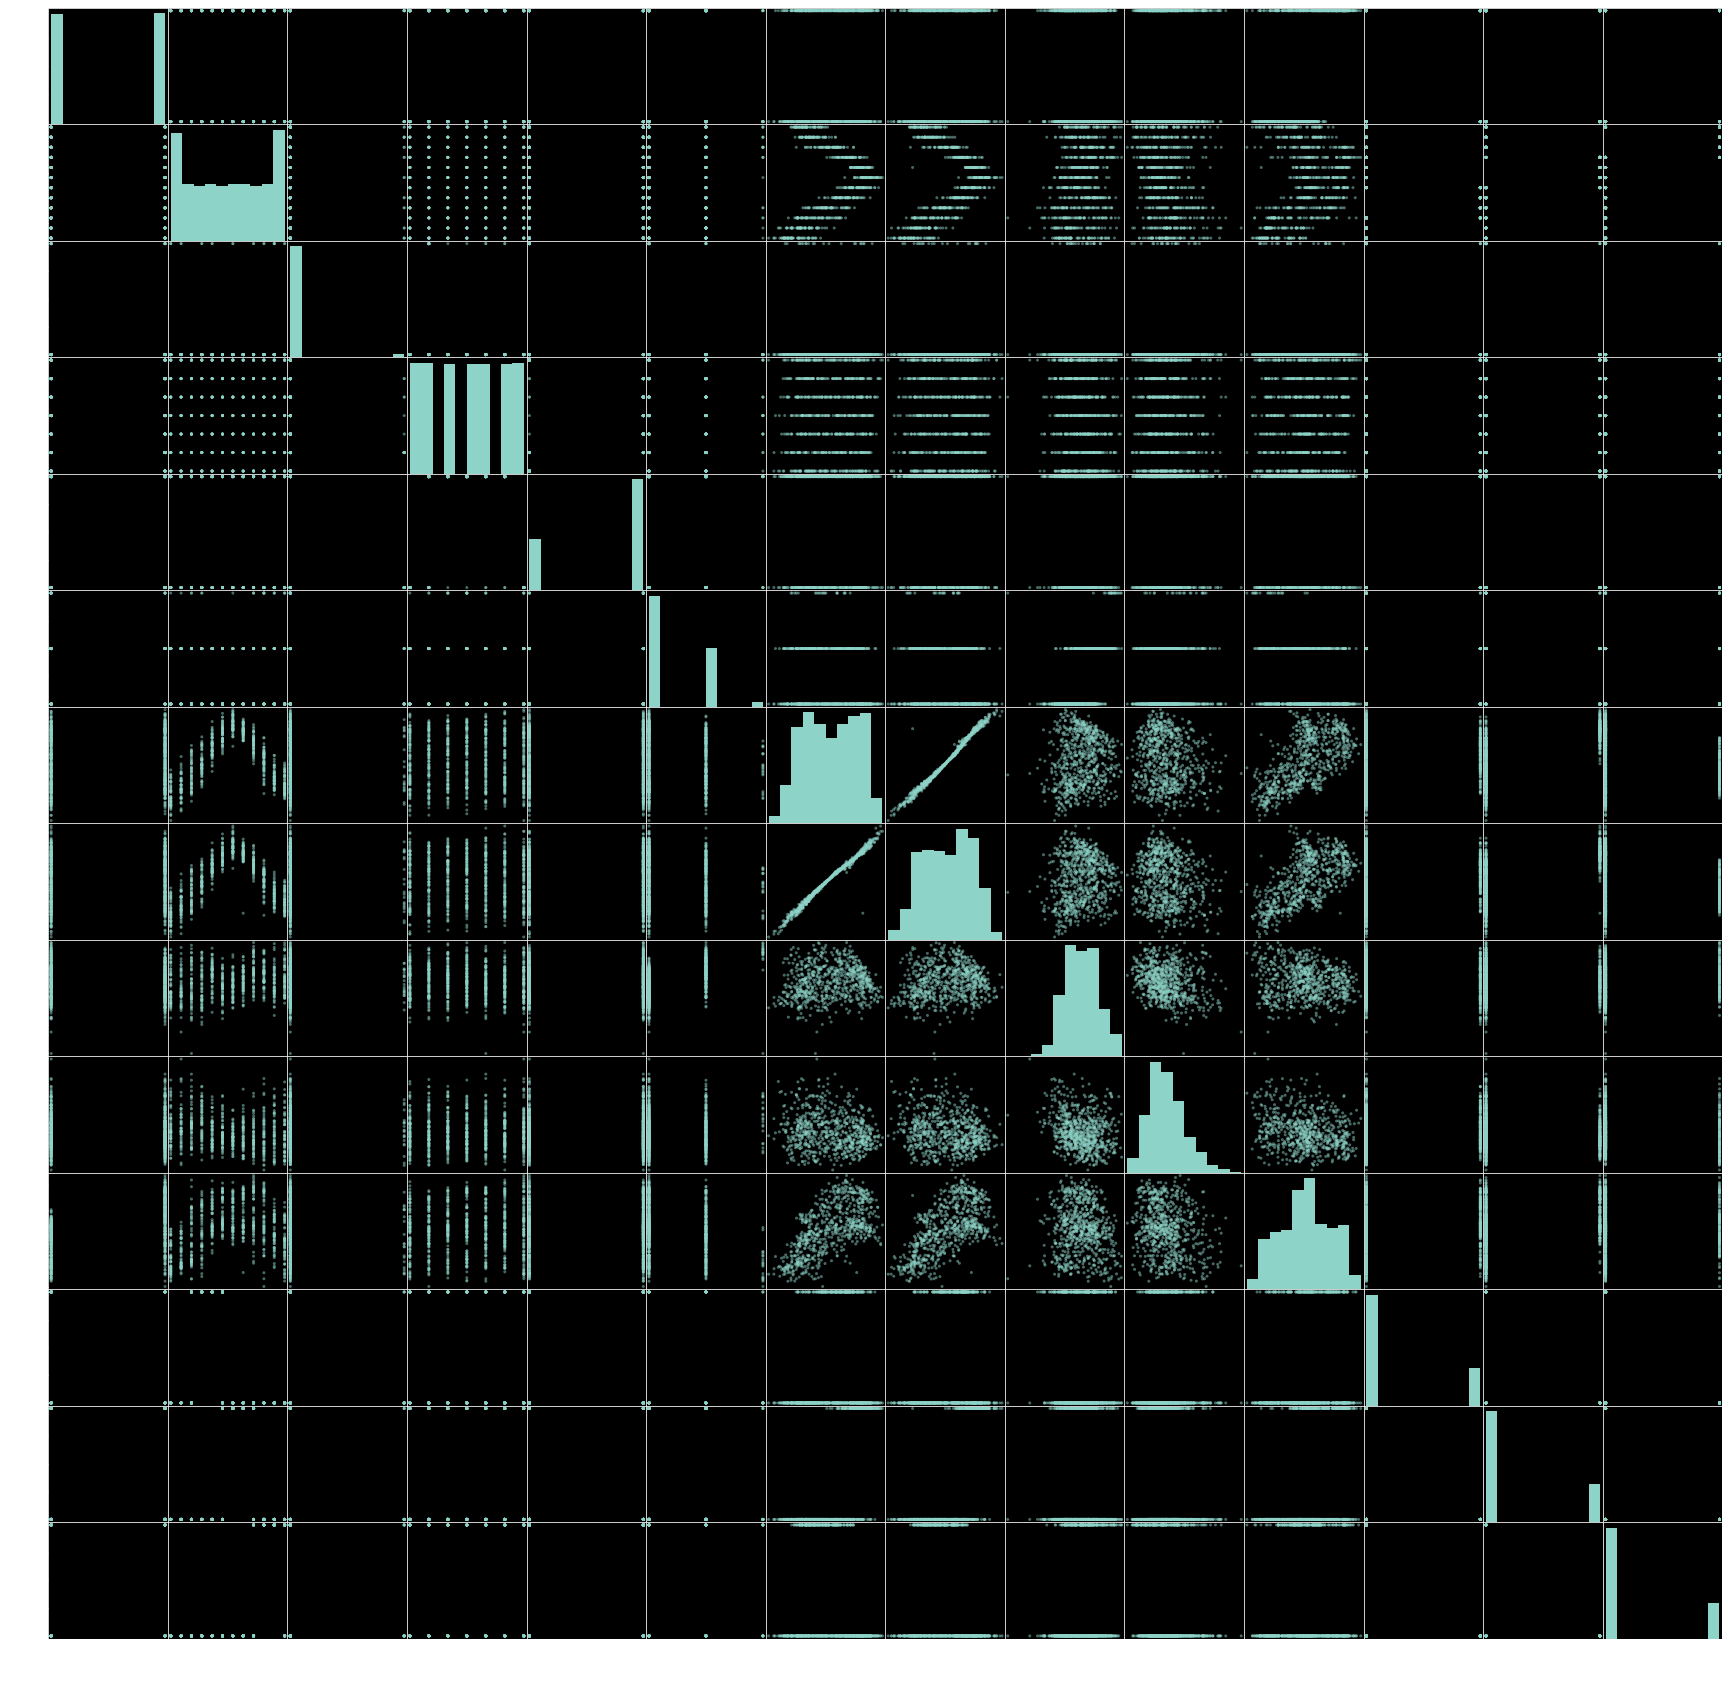

In [5]:
pd.plotting.scatter_matrix(dataset, alpha = .5, figsize=(30,30));

### Correlation

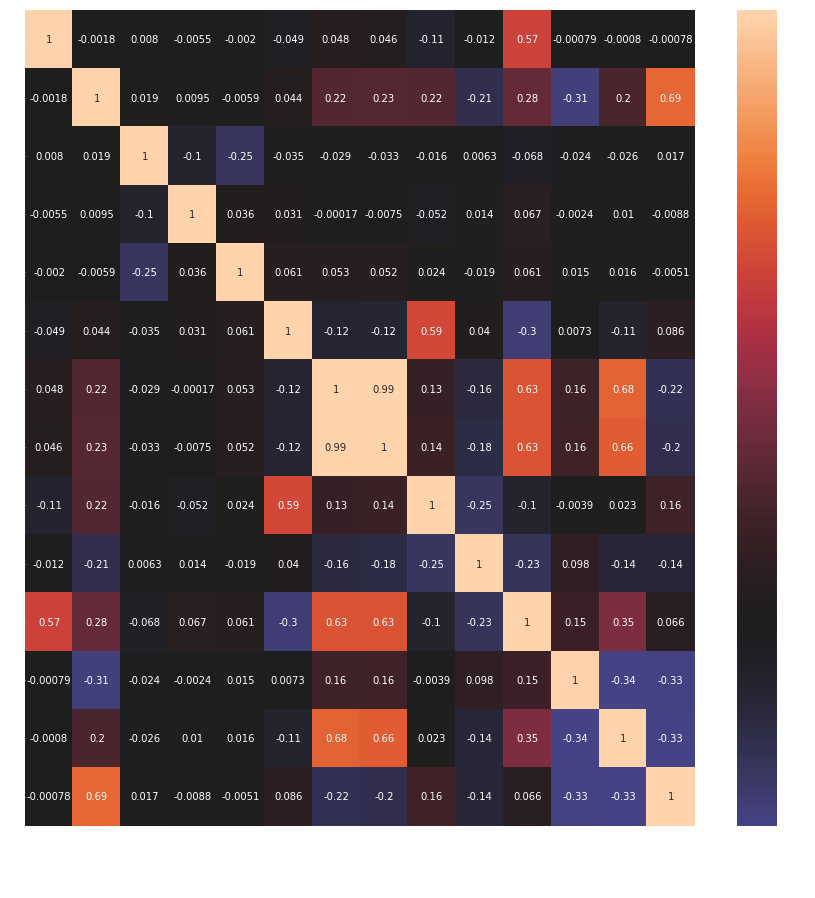

In [6]:
corr = dataset.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, center =0, annot = True);

In [7]:
print("Feature \tCorrelation with Num Bikers")
corrwHV = abs(dataset.corr()['cnt'].drop('cnt'));
corrwHV = corrwHV.sort_values()
print(corrwHV)

Feature 	Correlation with Num Bikers
workingday    0.061156
season_4      0.065593
weekday       0.067443
holiday       0.068348
hum           0.100659
season_2      0.146197
windspeed     0.234545
mnth          0.279977
weathersit    0.297391
season_3      0.346487
yr            0.566710
temp          0.627494
atemp         0.631066
Name: cnt, dtype: float64


We can see that **temp** is highly correlated with **atemp** are highly correlated, and so is **season** with **month**. So we can remove one from each pair without losing much information. We can also remove one of **working day** and **holiday** for simmilar reasons. as well as **humudity** since the relative correlation is low. **Holiday** also has a low correlation, but the scatter matrix shows that it is still important

In [8]:
dataset.drop(['atemp','mnth', 'workingday', 'hum'], axis = 'columns', inplace = True)
dataset

,yr,holiday,weekday,weathersit,temp,windspeed,cnt,season_2,season_3,season_4
0,0,0,6,2,0.344167,0.160446,985,0,0,0
1,0,0,0,2,0.363478,0.248539,801,0,0,0
2,0,0,1,1,0.196364,0.248309,1349,0,0,0
3,0,0,2,1,0.200000,0.160296,1562,0,0,0
4,0,0,3,1,0.226957,0.186900,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...
726,1,0,4,2,0.254167,0.350133,2114,0,0,0
727,1,0,5,2,0.253333,0.155471,3095,0,0,0
728,1,0,6,2,0.253333,0.124383,1341,0,0,0
729,1,0,0,1,0.255833,0.350754,1796,0,0,0


## Simple regression

In [26]:
#Splitting the data set into training and test set.
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )
#Normalising all the data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test  = scale.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 9), (147, 9), (584,), (147,))

In [27]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

models = [LinearRegression(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor()]
kfold = model_selection.KFold(n_splits=5)
max_explained_var = 0
model_num = 0
for n, model in enumerate(models):
    # options for scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #Throwback to stats, for simple regression "explained variance" = r^2
    pred = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='explained_variance')
    cv_score = pred.mean()
    print('Model:',model)
    print(pred.mean())
    if pred.mean() > max_explained_var:
        model_num = n
        max_explained_var = pred.mean()
        
print(f"\nBest Model: {models[model_num]}")

Model: LinearRegression()
0.5901023825349008
Model: Ridge()
0.5902121747429395
Model: DecisionTreeRegressor()
0.42010988457773724
Model: RandomForestRegressor()
0.6697212992458386

Best Model: RandomForestRegressor()


In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_test_hat = rfr.predict(X_test)
r_sq = rfr.score(X_test, y_test)
print(f"The best model had an r^2 of {r_sq}")

The best model had an r^2 of 0.6271435042735043


# Now time for PCA!

First 7 features capture 0.9633751426600774 of variance


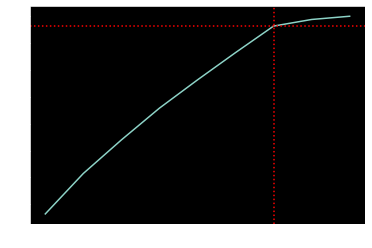

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsums = pca.explained_variance_ratio_.cumsum()
plt.plot(cumsums)
plt.axvline(x=6, color='red', linestyle='dotted')
plt.axhline(y=cumsums[6], color='red', linestyle='dotted')
print(F"First 7 features capture {cumsums[6]} of variance")

In [32]:
pca = PCA(n_components = 7)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
print(pca_X_train.shape)

models = [LinearRegression(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor()]
kfold = model_selection.KFold(n_splits=5)
max_explained_var = 0
model_num = 0
for n, model in enumerate(models):
    # options for scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    #Throwback to stats, for simple regression "explained variance" = r^2
    pred = model_selection.cross_val_score(model, pca_X_train, y_train, cv=kfold, scoring='explained_variance')
    cv_score = pred.mean()
    print('Model:',model)
    print(pred.mean())
    if pred.mean() > max_explained_var:
        model_num = n
        max_explained_var = pred.mean()
        
print(f"\nBest Model: {models[model_num]}")

(584, 8)
Model: LinearRegression()
0.5927149082016655
Model: Ridge()
0.5927423223038131
Model: DecisionTreeRegressor()
0.384773898511414
Model: RandomForestRegressor()
0.6478851077541032

Best Model: RandomForestRegressor()


In [35]:
rfr = RandomForestRegressor()
rfr.fit(pca_X_train, y_train)
r_sq = rfr.score(pca_X_test, y_test)
print(f"The best model had an r^2 of {r_sq}")

The best model had an r^2 of 0.5577310256410256


This example did not benefit much from using PCA to reduce the number of features. Can you guess why?

**A:** It was likely because there were few features to begin with, so there is not much reason to reduce them further